In [1]:
"""MNIST WORKSHOP WORKBOOK"""

'MNIST WORKSHOP WORKBOOK'

In [3]:
import torch as pt
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

In [ ]:
#Part1: The Perceptron

In [ ]:
"""
A perceptron is the simplest form of a neural network. It performs the following computation:

   y = σ(x @ w.T + b)

Where:
x: input vector (batch_size, input_features)
w: weight matrix (output_features, input_features)
b: bias vector (output_features)
σ: activation function (sigmoid in our case)
@: matrix multiplication
y: output vector (batch_size, output_features)

The sigmoid activation function σ(z) = 1 / (1 + exp(-z)) squashes values to (0, 1).
"""

In [4]:
sigmoid = nn.Sigmoid() # initialise the sigmoid function

# 1.1: Write a function "perceptron" that performs a single perceptron step.
"""
The function must accept three arguments: x (inputs), w (weights), and b (bias).
1. Calculate the linear step, z=xW^T +b.
Hint: You'll need to use matrix multiplication (@) and the transpose (.T) of the weights.
2. Apply the global sigmoid activation function to z.
3. Return the final activated output.
"""
def perceptron(x,w,b):
    z = x@w.T + b
    y = sigmoid(z)
    return y



In [196]:
# Let's train a perceptron to learn logical operations

x = pt.tensor([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
], dtype=pt.float32)

y = pt.tensor([
    [0],
    [1],
    [1],
    [1],
], dtype=pt.float32)

# Initialize weights: (1 output neuron, 2 input features).
# nn.Parameter tells PyTorch this tensor is learnable (track gradients).
w_or = nn.Parameter(pt.randn(1, 2))
b_or = nn.Parameter(pt.randn(1)) # Initialize bias: (1 bias value for the 1 output neuron).This is also a learnable parameter.

# Optimiser is responsible for updating our learnable parameters [w_or, b_or]. lr=1.0 is the learning rate, controlling the size of the update step.
optimizer = optim.SGD([w_or, b_or], lr=1.0)

# The lose function measures the average squared difference between our model's prediction and the correct answer (y_or).
criterion = nn.MSELoss() # Mean Squared Error



In [217]:
# 1.2: Write the training loop to teach the perceptron the "OR" gate:
"""
1. Create a for loop that runs for 10 epochs.
2. Inside the loop, implement the 5 core steps of training:
    a.Forward Pass: Get predictions from your perceptron function.
    b.Calculate Loss: Use the criterion to compare your predictions with y_or.
    c.Zero Gradients: Call optimizer.zero_grad().
    d.Backward Pass: Call .backward() on your loss.
    e.Update Weights: Call optimizer.step().
3. Add logic to print the loss every 10 epochs.
"""
num_epochs = 1000
for epoch in range(num_epochs):
  pred = perceptron(x, w_or, b_or)
  loss = criterion(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(f"Loss: {loss.item():.4f}")

Loss: 0.0003


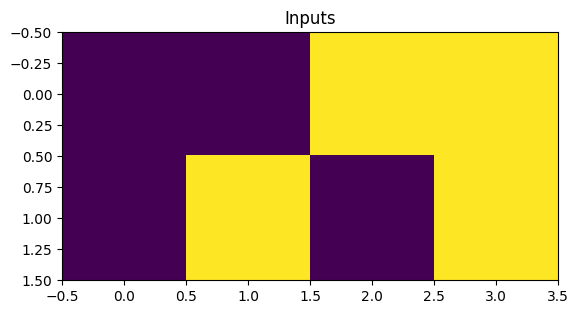

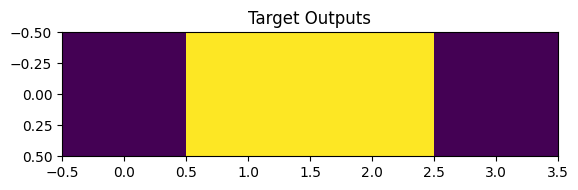

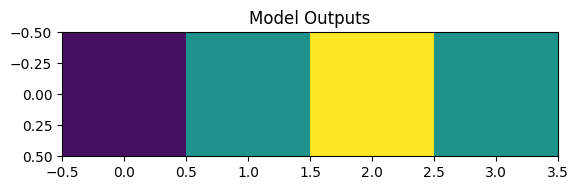

Parameters:
	Weights: tensor([[7.6132, 7.6132]])
	Bias: tensor([-3.5693])


In [270]:
# --- Visualization Checkpoint ---
"""
This is your visualization cell. Run this cell once to see the model's (random) initial predictions.
After you complete Task 1.3, you will run this cell again every time you run the training cell to see your model learn!
"""
plt.imshow(x.T, vmin=0)
plt.title("Inputs")
plt.show()

plt.imshow(y.T, vmin=0)
plt.title("Target Outputs")
plt.show()

plt.imshow(pred.detach().T, vmin=0)
plt.title("Model Outputs")
plt.show()

print(f"Parameters:\n\tWeights: {w_or.detach()}\n\tBias: {b_or.detach()}")

In [250]:
"""
Let's try XOR gate, after this try visualizing and then run the
[gradient descent cell] to your heart's content.
Observe how effectively the model can learn the XOR gate.
"""
x = pt.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=pt.float32)
y = pt.tensor([[0], [1], [1], [0]], dtype=pt.float32)
w_xor = nn.Parameter(pt.randn(1, 2))
b_xor = nn.Parameter(pt.randn(1))
optimizer = optim.SGD([w_xor, b_xor], lr=1.0)
criterion = nn.MSELoss()

In [264]:
"""
Write a new training loop for the XOR data.
1. Create a for loop that runs for 1000 epochs.
2. Implement the same 5 core steps of training as before, but using the x_xor and y_xor data.
3. Print the loss every 100 epochs.
4. Run the visualisation step
"""
num_epochs = 1000
for epoch in range(num_epochs):
  pred = perceptron(x, w_xor, b_xor)
  loss = criterion(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(f"Loss: {loss.item():.4f}")

Loss: 0.2500


In [ ]:
# Part2: Multi-Layer-Perceptron(MCP)

In [ ]:
"""
To solve non-linear problems like XOR, we can stack perceptrons into layers.
The output of one layer becomes the input to the next. This is an MLP
Input -> Perceptron Layer 1 (Hidden) -> Perceptron Layer 2 (Output)
"""

In [276]:
"""
let's start with 2-layer perceptron
"""
w_1 = nn.Parameter(pt.randn(2, 2))
b_1 = nn.Parameter(pt.randn(2))
w_2 = nn.Parameter(pt.randn(1, 2))
b_2 = nn.Parameter(pt.randn(1))

#Create optimizer for all parameters
optimizer = optim.SGD([w_1, b_1, w_2, b_2], lr=1)  # YOUR CODE HERE - SGD with lr=1, parameters=[w_1, b_1, w_2, b_2]

In [277]:
"""
2.1: Write a function mlp that uses your perceptron function twice.

1. The function should accept one argument: x (the input).
2. You will need to define the following parameters outside the function.
    a. w_1, b_1: For a hidden layer with 2 inputs and 2 neurons.
    b. w_2, b_2: For an output layer with 2 inputs and 1 neuron.
    c. optimiser for all the above defined parameters
    d. calling loss function
5. Inside the function:
    a. Pass x through the first perceptron (w_1, b_1) to get y_1.
    b. Pass y_1 through the second perceptron (w_2, b_2) to get the final output.
    c. Return the final output.
"""
def mlp(x, w_1, b_1, w_2, b_2):
  y_1 = perceptron(x, w_1, b_1)
  y_2 = perceptron(y_1, w_2, b_2)
  return y_2

In [278]:
"""
2.2: Write the training loop for the MLP

1. A for loop for 1000 epochs.
    a. The 5 training steps, this time using your mlp(x_xor) function and y_xor.
    b. Print the loss every 100 epochs.
"""
for _ in range(10000):
  pred = mlp(x, w_1, b_1, w_2, b_2)
  loss = criterion(pred, y)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

print(f"Loss: {loss.item():.4f}")

Loss: 0.0003


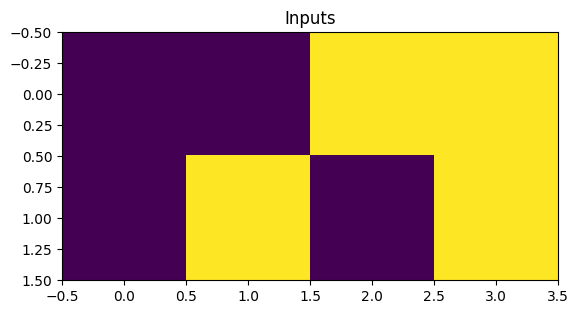

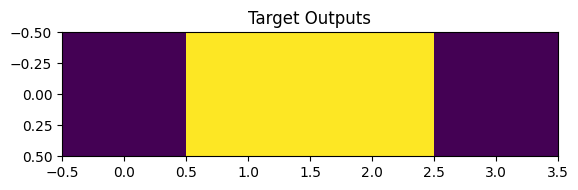

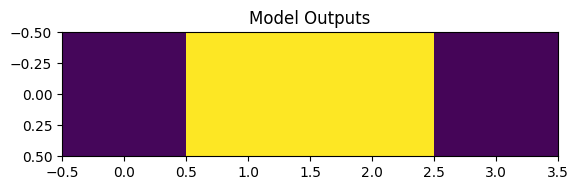

Parameters:
	Weights: tensor([[7.6132, 7.6132]])
	Bias: tensor([-3.5693])


In [279]:
"""
This is your visualization cell. Run this cell once to see the model's (random) initial predictions.
After you complete Task 1.3, you will run this cell again every time you run the training cell to see your model learn!
"""
plt.imshow(x.T, vmin=0)
plt.title("Inputs")
plt.show()

plt.imshow(y.T, vmin=0)
plt.title("Target Outputs")
plt.show()

plt.imshow(pred.detach().T, vmin=0)
plt.title("Model Outputs")
plt.show()

print(f"Parameters:\n\tWeights: {w_or.detach()}\n\tBias: {b_or.detach()}")

In [ ]:
#Part 3: A Practical MLP for Image Recognition

In [ ]:
"""
Manually managing weights is tedious. PyTorch makes this easy with the nn.Module class.
Let's build an actual MLP to recognize handwritten digits from the MNIST dataset.
"""

In [ ]:
"""
3.1: Build an MLP class that inherits from nn.Module.
1. In the __init__ method:
    a. Call super().__init__().
    b. Define a linear layer (nn.Linear) from 784 inputs (28*28) to 128 hidden neurons.
    c. Define a nn.ReLU activation function.
    d. Define a second linear layer from 128 inputs to 10 outputs (for digits 0-9).

2. In the forward method:
    a. The input x will have shape (batch_size, 1, 28, 28).
    b. First, flatten the image. (Hint: x = x.reshape(x.size(0), -1)).
    c. Pass x through your first linear layer.
    d. Pass the result through the ReLU activation.
    e. Pass the result through your second linear layer.
    f. Return the final output.
"""

In [281]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

transform = ToTensor()
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

print("Training dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.19MB/s]

Training dataset size: 60000
Test dataset size: 10000


In [282]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.reshape(len(x), -1)

        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


model = MLP()

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")
model = MLP()
print(model)

# For multi-class classification, this is the standard loss function.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Total number of learnable parameters: 101770
MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
"""
3.2: Write the full training loop for the MNIST dataset.
1. Create a for loop that runs for 3 epochs.
2. Inside that, create a nested for loop that iterates over the train_dataloader (this will give you images and labels).
3. Inside the inner loop, perform the 5 training steps (Forward, Loss, Zero, Backward, Step).
4. Add a print statement inside the inner loop to show progress (e.g., every 100 steps).
"""

In [284]:
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 3
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

Epoch [1/3], Step [100/938], Loss: 0.5666
Epoch [1/3], Step [200/938], Loss: 0.2434
Epoch [1/3], Step [300/938], Loss: 0.1521
Epoch [1/3], Step [400/938], Loss: 0.3560
Epoch [1/3], Step [500/938], Loss: 0.2472
Epoch [1/3], Step [600/938], Loss: 0.1503
Epoch [1/3], Step [700/938], Loss: 0.1994
Epoch [1/3], Step [800/938], Loss: 0.1608
Epoch [1/3], Step [900/938], Loss: 0.2208
Epoch [2/3], Step [100/938], Loss: 0.1549
Epoch [2/3], Step [200/938], Loss: 0.0712
Epoch [2/3], Step [300/938], Loss: 0.1140
Epoch [2/3], Step [400/938], Loss: 0.0405
Epoch [2/3], Step [500/938], Loss: 0.1888
Epoch [2/3], Step [600/938], Loss: 0.1483
Epoch [2/3], Step [700/938], Loss: 0.1245
Epoch [2/3], Step [800/938], Loss: 0.1014
Epoch [2/3], Step [900/938], Loss: 0.1150
Epoch [3/3], Step [100/938], Loss: 0.1114
Epoch [3/3], Step [200/938], Loss: 0.0893
Epoch [3/3], Step [300/938], Loss: 0.1136
Epoch [3/3], Step [400/938], Loss: 0.0817
Epoch [3/3], Step [500/938], Loss: 0.0894
Epoch [3/3], Step [600/938], Loss:

In [285]:
#Evaluate the Model you just trained
model.eval()

with pt.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
        outputs = model(images)
        predicted = pt.argmax(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the {total} test images: {100 * correct / total:.4f} %')

Accuracy of the model on the 10000 test images: 96.7600 %


Showing 5 test images and their predictions...


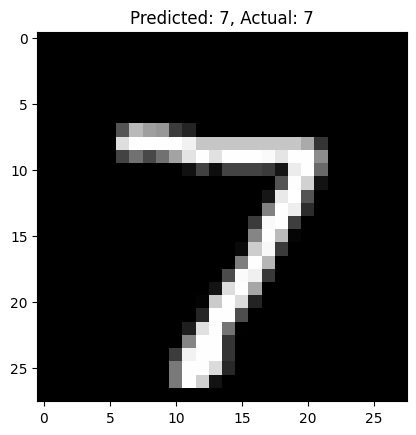

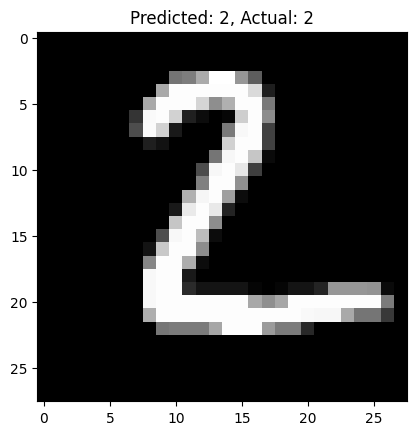

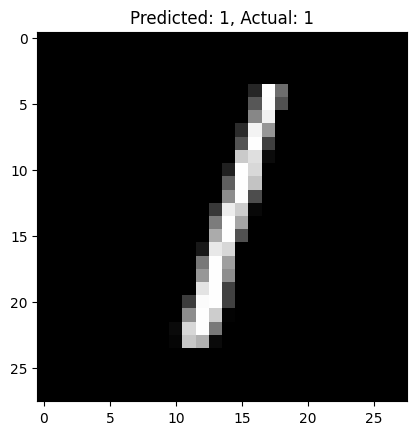

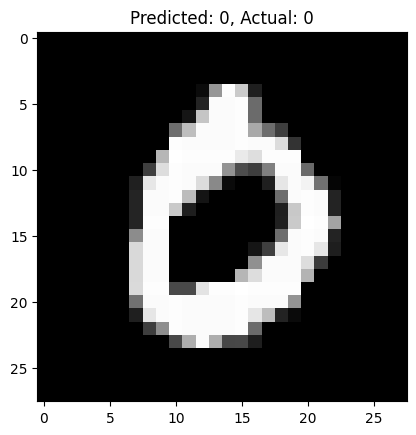

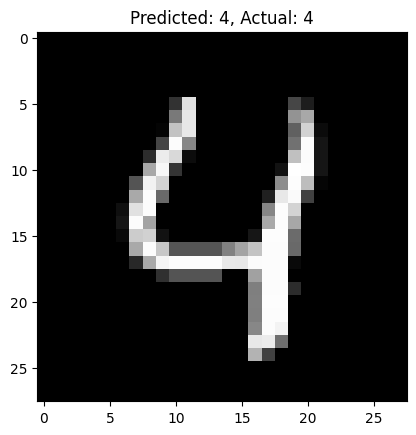

In [286]:
model.eval()

data_iter = iter(test_dataloader)
images, labels = next(data_iter)
images_to_show = images[:5]
labels_to_show = labels[:5]

with pt.no_grad():
    outputs = model(images_to_show)

_, predicted = pt.max(outputs.data, 1)


print("Showing 5 test images and their predictions...")
for i in range(5):
    plt.imshow(images_to_show[i][0], cmap='gray') # [i][0] to get the 2D image
    plt.title(f"Predicted: {predicted[i].item()}, Actual: {labels_to_show[i].item()}")
    plt.show()

In [ ]:
#Part-4:CONVOLUTIONAL NEURAL NETWORKS (CNN)

In [ ]:
"""
MLPs treat images as flat vectors, losing spatial structure. CNNs use:

1. CONVOLUTION: Detect local patterns (edges, corners) using small filters
      - A 3x3 filter slides across the image
      - Computes weighted sum at each position
      - Learns filters through backpropagation

2. POOLING: Reduce spatial dimensions while retaining important features
   - Downsamples feature maps
   - Provides translation invariance
   - Reduces computation

Architecture we'll build:
Input (28x28x1)
  -> Conv(16 filters, 3x3) + ReLU + AvgPool(2x2)
  -> Conv(32 filters, 3x3) + ReLU + AvgPool(2x2)
  -> Flatten
  -> Linear(10)
"""

In [287]:
# --- Setup for CNNS
# This cell provides all the imports and data you'll need for this part of the workshop
import torch as pt
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

transform = ToTensor()
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

print("Training dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Training dataset size: 60000
Test dataset size: 10000


Label: 0


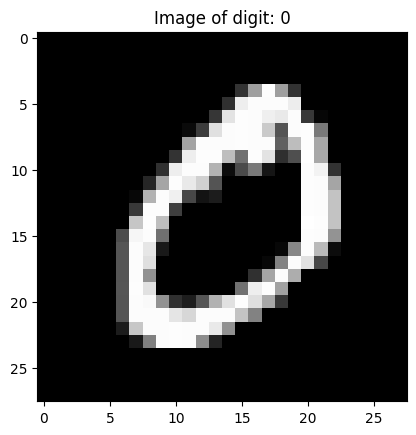

In [288]:
#4.1: grab one image from the train_dataset and visualize it.

"""
1. Get img, label from train_dataset[1]
2. Print the label.
3. Use plt.imshow() to show the img.
Hint: img has a shape of [1, 28, 28]. You need to show img[0]. Use cmap='gray'.
4. Call plt.show().
"""

img, label = train_dataset[1]
print(f"Label: {label}")
plt.imshow(img[0], cmap='gray')
plt.title(f"Image of digit: {label}")
plt.show()

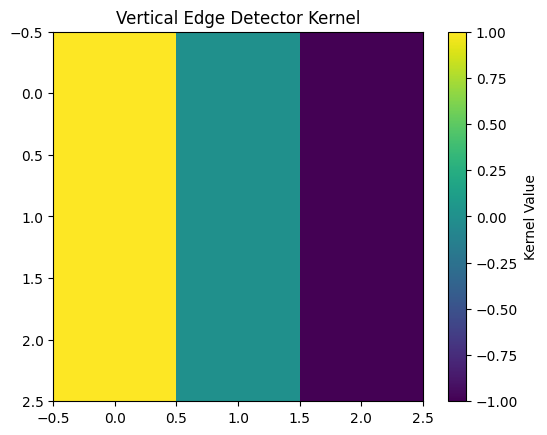

In [289]:
"""
4.2: Define and visualize a 3x3 vertical edge detector kernel.

- A "kernel" is just a small matrix that acts as a feature detector. We'll create one that detects vertical edges.

1. Define a variable kernel as a pt.tensor with dtype=pt.float32.
2. The tensor's values should be: [[1, 0, -1], [1, 0, -1], [1, 0, -1]].
3. Use plt.imshow(kernel) and plt.show() to see what it looks like.
"""

kernel = pt.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=pt.float32)
plt.imshow(kernel)
plt.title("Vertical Edge Detector Kernel")
plt.colorbar(label='Kernel Value')
plt.show()

In [ ]:
"""
4.3: Apply your kernel to one 3x3 patch of the image and visualize each step.

1. Define a location: i, j = 16, 5.
2. Extract the 3x3 patch from img[0] at that location.
Hint: patch = img[0, i:i+3, j:j+3]

3. Visualization 1: Use plt.imshow(patch, cmap="gray") and plt.show() to see the raw patch.
4. Visualization 2: Show the result of the element-wise multiplication.
Hint: plt.imshow(patch * kernel, vmin=0, vmax=1) and plt.show().

5. Visualization 3: Show the final summed value. This single number is the output of the convolution for this one pixel.
Hint: plt.imshow(pt.sum(patch * kernel)[None, None], vmin=0, vmax=1) and plt.show().
"""

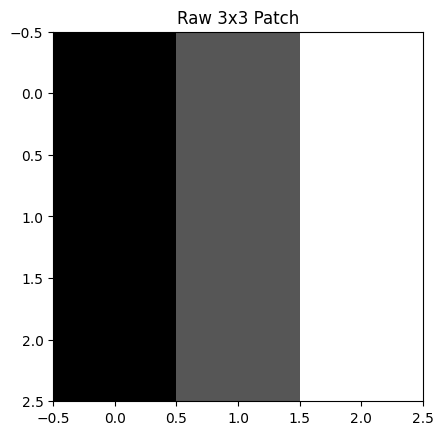

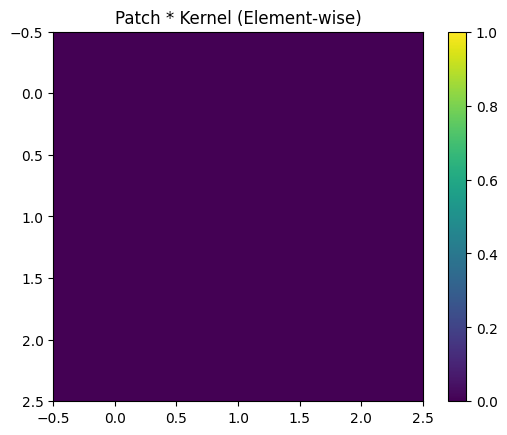

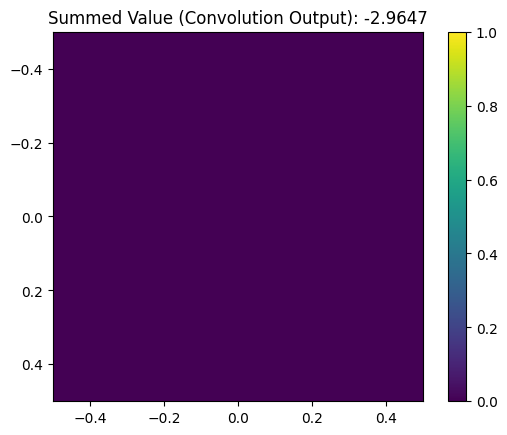

In [290]:
#Code here

i, j = 16, 5
patch = img[0, i:i+3, j:j+3]

# Visualization 1: Raw patch
plt.imshow(patch, cmap="gray")
plt.title("Raw 3x3 Patch")
plt.show()

# Visualization 2: Element-wise multiplication
plt.imshow(patch * kernel, vmin=0, vmax=1)
plt.title("Patch * Kernel (Element-wise)")
plt.colorbar()
plt.show()

# Visualization 3: Final summed value (convolution output for this pixel)
# [None, None] is used to make it a 1x1 image for imshow
plt.imshow(pt.sum(patch * kernel)[None, None], vmin=0, vmax=1, cmap='viridis')
plt.title(f"Summed Value (Convolution Output): {pt.sum(patch * kernel).item():.4f}")
plt.colorbar()
plt.show()

In [ ]:
"""
4.4: Write the nested loops to perform a full convolution.

1. A 28x28 image convolved with a 3x3 kernel (with no padding) results in a 26x26 feature map.
   Create an empty tensor of this size: feature_map = pt.zeros(26, 26).
2. Write a for loop that iterates i from 0 to 25.
3. Inside, write a nested for loop that iterates j from 0 to 25.
4. Inside the nested loop:
5. Get the 3x3 patch from img[0] at the (i, j) location.
6. Calculate the convolved value by multiplying the patch and kernel and getting their sum().
7. Store this value in your feature map at feature_map[i, j].

-> Visualization: After the loops, plt.imshow(feature_map.numpy(), vmin=0, vmax=1) to see the result.
"""

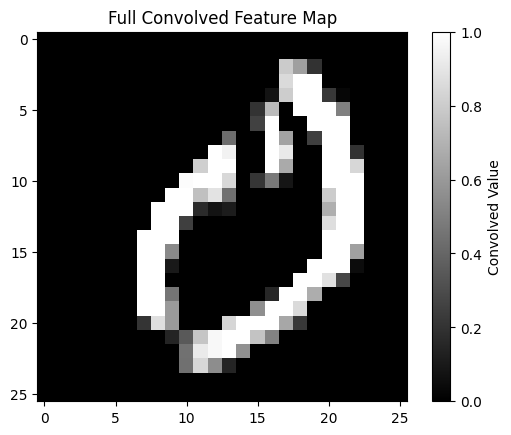

In [291]:
#Code here

feature_map = pt.zeros(26, 26)

for i in range(26):
    for j in range(26):
        patch = img[0, i:i+3, j:j+3]
        convolved_value = pt.sum(patch * kernel)
        feature_map[i, j] = convolved_value

plt.imshow(feature_map.numpy(), vmin=0, vmax=1, cmap='gray')
plt.title("Full Convolved Feature Map")
plt.colorbar(label='Convolved Value')
plt.show()

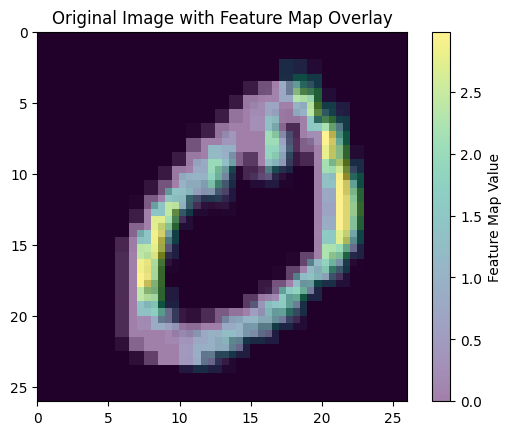

In [292]:
#let's overlay our new "edge map" on top of the original image to see where the features were detected.

plt.imshow(img[0], cmap='gray')
plt.title("Original Image with Feature Map Overlay")
plt.imshow(feature_map, cmap='viridis', alpha=0.5, extent=[0, 26, 26, 0], vmin=0)
plt.colorbar(label='Feature Map Value')
plt.title("Original Image with Feature Map Overlay")
plt.show()


In [ ]:
"""
4.5: Define the CNN class using nn.Module
1. In __init__:
    a. Call super().__init__().
    b. Define Conv Stack 1: nn.Conv2d (1 in, 16 out, kernel 3, pad 1), nn.ReLU(), nn.AvgPool2d (kernel 2, stride 2).
    c. Define Conv Stack 2: nn.Conv2d (16 in, 32 out, kernel 3, pad 1), nn.ReLU(), nn.AvgPool2d (kernel 2, stride 2).
    d. Define a final Linear Layer: nn.Linear (input 32 * 7 * 7, output 10).

In forward(x):
    a. Pass x through Stack 1 (Conv1 -> ReLU1 -> Pool1).
    b. Pass the result through Stack 2 (Conv2 -> ReLU2 -> Pool2).
    c. Flatten the output. (Hint: out = out.reshape(out.size(0), -1)).
    d. Pass the flattened output through your final linear layer.
    e. Return the result.
"""

In [295]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 7 * 7, 10) # The size should still be 7x7 after two 2x2 pooling layers with stride 2 on a 28x28 image

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.avgpool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.avgpool2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = CNN()

In [ ]:
"""
4.6: Write the training loop for the MNIST dataset.
    a. Create a for loop that runs for 3 epochs.
    b. Create a nested for loop that iterates over the train_dataloader (getting images and labels).
    c. Inside the inner loop, perform the 5 training steps (forward, loss, zero, backward, step).
    d. Print the loss every 100 steps.
"""

In [296]:
#Code here

num_epochs = 3
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # Forward pass
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}')

Epoch [1/3], Step [100/938], Loss: 0.7415
Epoch [1/3], Step [200/938], Loss: 0.4166
Epoch [1/3], Step [300/938], Loss: 0.3567
Epoch [1/3], Step [400/938], Loss: 0.1873
Epoch [1/3], Step [500/938], Loss: 0.1209
Epoch [1/3], Step [600/938], Loss: 0.1822
Epoch [1/3], Step [700/938], Loss: 0.1379
Epoch [1/3], Step [800/938], Loss: 0.2557
Epoch [1/3], Step [900/938], Loss: 0.3081
Epoch [2/3], Step [100/938], Loss: 0.1204
Epoch [2/3], Step [200/938], Loss: 0.0516
Epoch [2/3], Step [300/938], Loss: 0.0882
Epoch [2/3], Step [400/938], Loss: 0.1358
Epoch [2/3], Step [500/938], Loss: 0.0400
Epoch [2/3], Step [600/938], Loss: 0.0216
Epoch [2/3], Step [700/938], Loss: 0.1140
Epoch [2/3], Step [800/938], Loss: 0.1142
Epoch [2/3], Step [900/938], Loss: 0.1273
Epoch [3/3], Step [100/938], Loss: 0.0178
Epoch [3/3], Step [200/938], Loss: 0.0198
Epoch [3/3], Step [300/938], Loss: 0.1255
Epoch [3/3], Step [400/938], Loss: 0.0684
Epoch [3/3], Step [500/938], Loss: 0.0292
Epoch [3/3], Step [600/938], Loss:

In [298]:
# You've trained it! Let's see the accuracy. We've provided the evaluation code for you
# Run this cell to see the accuracy of your trained CNN!

print("Evaluating model on the test dataset...")

# Set the model to evaluation mode
cnn_model.eval()

correct = 0
total = 0

with pt.no_grad():
    for images, labels in test_dataloader:
        # 1. Forward pass
        outputs = cnn_model(images)

        # 2. Get the predicted class
        _, predicted = pt.max(outputs.data, 1)

        # 3. Update totals
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print the final accuracy
accuracy = 100 * correct / total
print(f'\nAccuracy of the CNN on the 10000 test images: {accuracy:.2f} %')

Evaluating model on the test dataset...

Accuracy of the CNN on the 10000 test images: 98.09 %



--- Visualizing CNN Predictions ---
Showing 5 test images and their predictions...


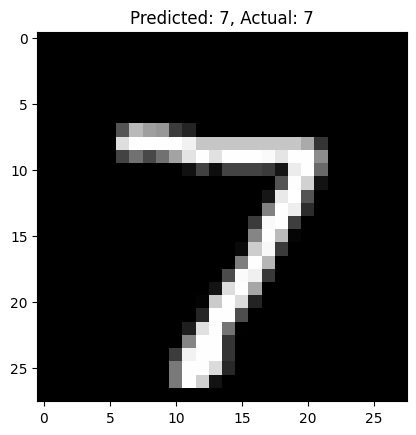

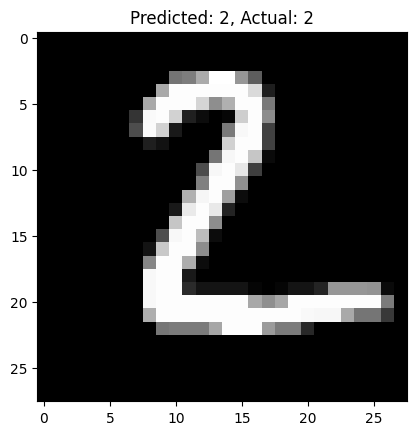

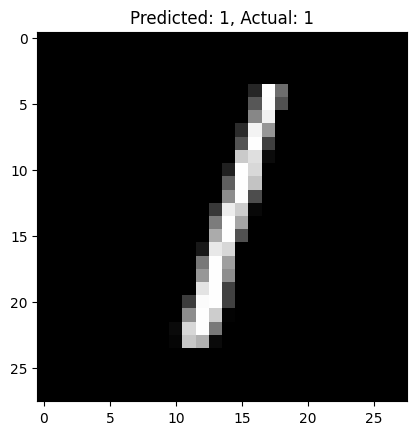

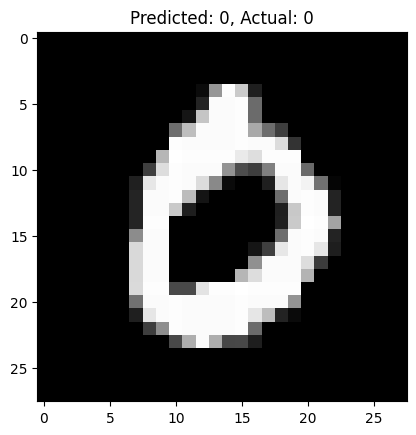

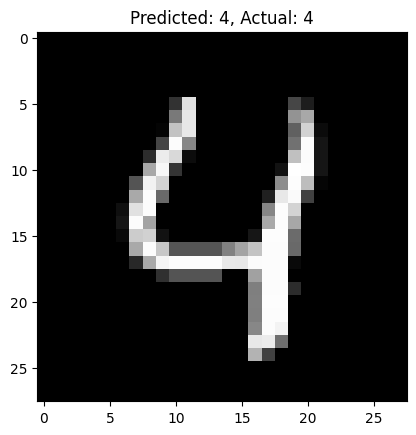

In [297]:
# Run this cell to see your trained CNN in action!

print("\n--- Visualizing CNN Predictions ---")

# 1. Get one batch of test data
data_iter = iter(test_dataloader)
images, labels = next(data_iter)

# 2. Get the first 5 images
images_to_show = images[:5]
labels_to_show = labels[:5]

# 3. Pass these 5 images through your trained cnn_model
with pt.no_grad():
    outputs = cnn_model(images_to_show)

# 4. Get the predicted class index (the one with the highest score)
_, predicted = pt.max(outputs.data, 1)

# 5. Loop and plot
print("Showing 5 test images and their predictions...")
for i in range(5):
    # Set up the plot
    # images_to_show[i][0] gets the i-th image and its 0-th channel (the grayscale data)
    plt.imshow(images_to_show[i][0], cmap='gray')

    # Set the title with the prediction and the true label
    # .item() converts the tensor value to a plain Python number
    plt.title(f"Predicted: {predicted[i].item()}, Actual: {labels_to_show[i].item()}")

    # Show the plot
    plt.show()

In [ ]:
"""
THE END
"""